# Iris Flower Classification

> Import the necessary modules

In [123]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns  
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error,confusion_matrix
from sklearn.linear_model import LogisticRegression

In [124]:
data = pd.read_csv('Data\\IRIS.csv')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


>Data Exploraing

In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [126]:
data.describe

<bound method NDFrame.describe of      sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]>

In [127]:
print(f'the number of missing data= {data.isnull().values.sum()}')


the number of missing data= 0


>Data Visualization

In [128]:
data=pd.DataFrame({'petal_A':data['petal_length']*data['petal_width'],
                'sepal_A':data['sepal_length']*data['sepal_width'],
                'species':data['species']})
data

,petal_A,sepal_A,species
0,0.28,17.85,Iris-setosa
1,0.28,14.70,Iris-setosa
2,0.26,15.04,Iris-setosa
3,0.30,14.26,Iris-setosa
4,0.28,18.00,Iris-setosa
...,...,...,...
145,11.96,20.10,Iris-virginica
146,9.50,15.75,Iris-virginica
147,10.40,19.50,Iris-virginica
148,12.42,21.08,Iris-virginica


C:\Users\HP\AppData\Local\Temp\ipykernel_120\656763873.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['petal_A'])
C:\Users\HP\AppData\Local\Temp\ipykernel_120\656763873.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['sepal_A'])


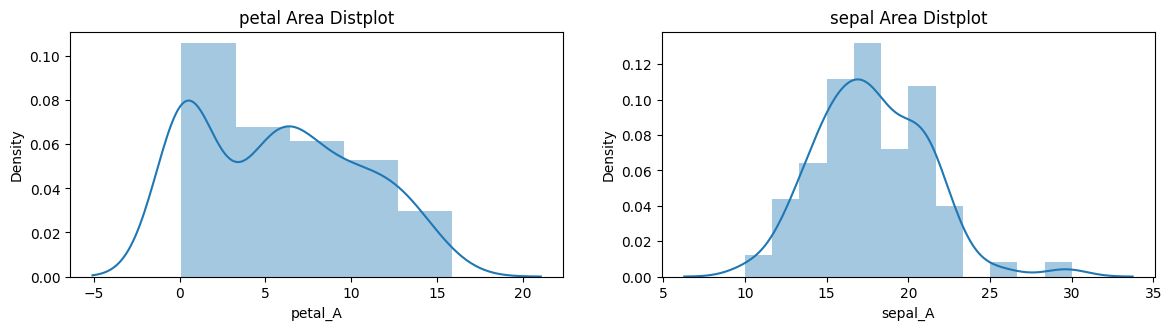

In [129]:
plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
sns.distplot(data['petal_A'])
plt.title('petal Area Distplot')
plt.subplot(2,2,2)
sns.distplot(data['sepal_A'])
plt.title('sepal Area Distplot')
plt.show()

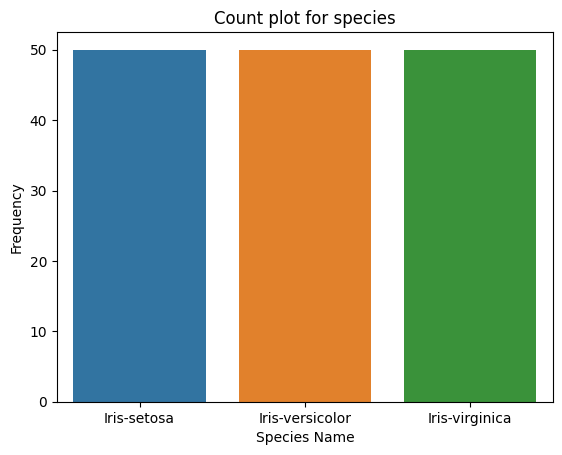

In [130]:
sns.countplot(data=data ,x='species')
plt.title('Count plot for species')
plt.xlabel('Species Name')
plt.ylabel('Frequency')
plt.show()

>Data Preprocessing

In [131]:
data['species'].replace({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2},inplace=True)
data.head()

,petal_A,sepal_A,species
0,0.28,17.85,0
1,0.28,14.70,0
2,0.26,15.04,0
3,0.30,14.26,0
4,0.28,18.00,0


In [132]:
features = data.drop(columns='species')
targets = data['species']
features

,petal_A,sepal_A
0,0.28,17.85
1,0.28,14.70
2,0.26,15.04
3,0.30,14.26
4,0.28,18.00
...,...,...
145,11.96,20.10
146,9.50,15.75
147,10.40,19.50
148,12.42,21.08


In [133]:
x_train , x_test,y_train,y_test= train_test_split(features,targets,random_state=3,test_size=0.30)

In [134]:
print(f'shape of x_train: {x_train.shape}')
print(f'shape of x_test: {x_test.shape}')
print(f'shape of y_train: {y_train.shape}')
print(f'shape of y_test: {y_test.shape}')


shape of x_train: (105, 2)
shape of x_test: (45, 2)
shape of y_train: (105,)
shape of y_test: (45,)


>Model Training

In [135]:
softmax_reg=LogisticRegression(multi_class='multinomial',solver='lbfgs')
softmax_reg.fit(x_train,y_train)

LogisticRegression(multi_class='multinomial')

In [136]:
yhat=softmax_reg.predict(x_train)
accuracy = accuracy_score(yhat,y_train)
mse = mean_squared_error(yhat,y_train)
cm= confusion_matrix(yhat,y_train)

print(f'Accuracy of the training data= {accuracy*100:1.2f}%')
print(f'Print mse of the training data= {mse/2}')
print(f'Confusion Matrix of the training data= \n{cm}')

Accuracy of the training data= 97.14%
Print mse of the training data= 0.014285714285714285
Confusion Matrix of the training data= 
[[33  0  0]
 [ 0 34  1]
 [ 0  2 35]]


>Model Evaluation

In [137]:
yhat_test=softmax_reg.predict(x_test)
accuracy_test = accuracy_score(yhat_test,y_test)
mse_test = mean_squared_error(yhat_test,y_test)
cm_test= confusion_matrix(yhat_test,y_test)


print(f'Accuracy of the training data= {accuracy_test*100:1.2f}%')
print(f'Print mse of the training data= {mse_test/2}')
print(f'Confusion Matrix of the training data= \n{cm_test}')

Accuracy of the training data= 100.00%
Print mse of the training data= 0.0
Confusion Matrix of the training data= 
[[17  0  0]
 [ 0 14  0]
 [ 0  0 14]]
